IMPORTING PYSPARK

In [1]:
from pyspark.sql import SparkSession
spark = SparkSession \
    .builder \
    .appName('Housing Data') \
    .getOrCreate()

LOADING DATASET

In [2]:
df = (spark.read.format("csv").option('header', 'true').load("Housing.csv"))

DATAFRAME HEAD & DATA TYPES

In [3]:
df.head()

Row(id='7129300520', date='20141013T000000', price='221900', bedrooms='3', bathrooms='1', sqft_living='1180', sqft_lot='5650', floors='1', waterfront='0', view='0', condition='3', grade='7', sqft_above='1180', sqft_basement='0', yr_built='1955', yr_renovated='0', zipcode='98178', lat='47.5112', long='-122.257', sqft_living15='1340', sqft_lot15='5650')

In [4]:
df.dtypes

[('id', 'string'),
 ('date', 'string'),
 ('price', 'string'),
 ('bedrooms', 'string'),
 ('bathrooms', 'string'),
 ('sqft_living', 'string'),
 ('sqft_lot', 'string'),
 ('floors', 'string'),
 ('waterfront', 'string'),
 ('view', 'string'),
 ('condition', 'string'),
 ('grade', 'string'),
 ('sqft_above', 'string'),
 ('sqft_basement', 'string'),
 ('yr_built', 'string'),
 ('yr_renovated', 'string'),
 ('zipcode', 'string'),
 ('lat', 'string'),
 ('long', 'string'),
 ('sqft_living15', 'string'),
 ('sqft_lot15', 'string')]

SUMMARY - DATAFRAME FEATURES

In [5]:
df.describe().toPandas().transpose()

,0,1,2,3,4
summary,count,mean,stddev,min,max
id,1048574,4.579861275310459E9,2.8763916519559584E9,1000102,999000215
date,1048574,None,None,20140502T000000,20150527T000000
price,1048574,540000.9407280745,367160.25436746876,1.00E+06,999999
bedrooms,1048574,3.3707616248352523,0.9298424990258323,0,9
bathrooms,1048574,2.114187935233946,0.7700672393270263,0,8
sqft_living,1048574,2079.600361061785,918.2777039636362,1000,998
sqft_lot,1048574,15114.805397616192,41446.225024989784,1000,9999
floors,1048574,1.4936575768615281,0.5397294437285176,1,3.5
waterfront,1048574,0.007542624554871664,0.08652017399813725,0,1


In [6]:
from pyspark.sql.functions import col
dataset = df.select(col('price').cast('float'),
                         col('bedrooms').cast('int'),
                         col('bathrooms').cast('float'),
                         col('sqft_living').cast('int'),
                         col('sqft_lot').cast('int'),
                         col('floors').cast('float'),
                        col('waterfront').cast('int'),
                        col('view').cast('int'),
                        col('condition').cast('int'),
                        col('grade').cast('int'),
                        col('sqft_basement').cast('int'),
                        col('yr_built').cast('int'),
                        col('yr_renovated').cast('int'),
                        col('lat').cast('float'),
                        col('long').cast('float'),
                        col('sqft_living15').cast('int'),
                        col('sqft_lot15').cast('int')
                        )
dataset.show()

+---------+--------+---------+-----------+--------+------+----------+----+---------+-----+-------------+--------+------------+-------+--------+-------------+----------+
|    price|bedrooms|bathrooms|sqft_living|sqft_lot|floors|waterfront|view|condition|grade|sqft_basement|yr_built|yr_renovated|    lat|    long|sqft_living15|sqft_lot15|
+---------+--------+---------+-----------+--------+------+----------+----+---------+-----+-------------+--------+------------+-------+--------+-------------+----------+
| 221900.0|       3|      1.0|       1180|    5650|   1.0|         0|   0|        3|    7|            0|    1955|           0|47.5112|-122.257|         1340|      5650|
| 538000.0|       3|     2.25|       2570|    7242|   2.0|         0|   0|        3|    7|          400|    1951|        1991| 47.721|-122.319|         1690|      7639|
| 180000.0|       2|      1.0|        770|   10000|   1.0|         0|   0|        3|    6|            0|    1933|           0|47.7379|-122.233|         272

In [7]:
dataset.dtypes

[('price', 'float'),
 ('bedrooms', 'int'),
 ('bathrooms', 'float'),
 ('sqft_living', 'int'),
 ('sqft_lot', 'int'),
 ('floors', 'float'),
 ('waterfront', 'int'),
 ('view', 'int'),
 ('condition', 'int'),
 ('grade', 'int'),
 ('sqft_basement', 'int'),
 ('yr_built', 'int'),
 ('yr_renovated', 'int'),
 ('lat', 'float'),
 ('long', 'float'),
 ('sqft_living15', 'int'),
 ('sqft_lot15', 'int')]

MODEL TRAINING

In [8]:
# Assemble all the features with VectorAssembler
required_features = ['bedrooms','bathrooms','sqft_living','sqft_lot','floors','waterfront','view','condition','grade','sqft_basement',
                     'yr_built','yr_renovated','lat','long','sqft_living15','sqft_lot15'] 
from pyspark.ml.feature import VectorAssembler
assembler = VectorAssembler(inputCols=required_features, outputCol='features')
transformed_data = assembler.transform(dataset)
# transformed_data.select('features').show()
transformed_data.show()

+---------+--------+---------+-----------+--------+------+----------+----+---------+-----+-------------+--------+------------+-------+--------+-------------+----------+--------------------+
|    price|bedrooms|bathrooms|sqft_living|sqft_lot|floors|waterfront|view|condition|grade|sqft_basement|yr_built|yr_renovated|    lat|    long|sqft_living15|sqft_lot15|            features|
+---------+--------+---------+-----------+--------+------+----------+----+---------+-----+-------------+--------+------------+-------+--------+-------------+----------+--------------------+
| 221900.0|       3|      1.0|       1180|    5650|   1.0|         0|   0|        3|    7|            0|    1955|           0|47.5112|-122.257|         1340|      5650|[3.0,1.0,1180.0,5...|
| 538000.0|       3|     2.25|       2570|    7242|   2.0|         0|   0|        3|    7|          400|    1951|        1991| 47.721|-122.319|         1690|      7639|[3.0,2.25,2570.0,...|
| 180000.0|       2|      1.0|        770|   10000

In [9]:
(training_data, test_data) = transformed_data.randomSplit([0.7,0.3])

In [10]:
training_data.show()

+-------+--------+---------+-----------+--------+------+----------+----+---------+-----+-------------+--------+------------+-------+--------+-------------+----------+--------------------+
|  price|bedrooms|bathrooms|sqft_living|sqft_lot|floors|waterfront|view|condition|grade|sqft_basement|yr_built|yr_renovated|    lat|    long|sqft_living15|sqft_lot15|            features|
+-------+--------+---------+-----------+--------+------+----------+----+---------+-----+-------------+--------+------------+-------+--------+-------------+----------+--------------------+
|75000.0|       1|      0.0|        670|   43377|   1.0|         0|   0|        3|    3|            0|    1966|           0|47.2638|-121.906|         1160|     42882|[1.0,0.0,670.0,43...|
|75000.0|       1|      0.0|        670|   43377|   1.0|         0|   0|        3|    3|            0|    1966|           0|47.2638|-121.906|         1160|     42882|[1.0,0.0,670.0,43...|
|75000.0|       1|      0.0|        670|   43377|   1.0|    

In [11]:
# from pyspark.ml.classification import LogisticRegression
# lr = LogisticRegression(featuresCol='features',labelCol='price')

In [12]:
# from pyspark.ml import Pipeline
# regression_pipeline = Pipeline(stages= [lr])

In [13]:
# model = lr.fit(training_data)

In [14]:
# predictions = model.transform(test_data)

RANDOM FOREST REGRESSION

- IMPORTING LIBRARIES & FUNCTION WITH PARAMETERS

In [15]:
from pyspark.ml.regression import RandomForestRegressor
rf = RandomForestRegressor(labelCol="price", featuresCol="features")

- MODEL FIT

In [16]:
import time

In [17]:
start_timeRF = time.perf_counter()

modelRF = rf.fit(training_data)
predictionsRF = modelRF.transform(test_data)

end_timeRF = time.perf_counter()
training_timeRF = end_timeRF - start_timeRF

- EXECUTION TIME & PERFORMANCE

In [18]:
print('Random Forest Model Start Time = ', start_timeRF)
print('Random Forest Model End Time = ', end_timeRF)
print('Random Forest Model Total Training Time = ', training_timeRF)

Random Forest Model Start Time =  10861.2556735
Random Forest Model End Time =  10914.7689614
Random Forest Model Total Training Time =  53.51328789999934


- RMSE & R Square - TEST ACCURACIES

In [19]:
# Evaluate our model
from pyspark.ml.evaluation import RegressionEvaluator, MulticlassClassificationEvaluator
#evaluator = MulticlassClassificationEvaluator(
#    labelCol='price', 
#    predictionCol='prediction', 
#    metricName='accuracy')
evaluatorrf1 = RegressionEvaluator(labelCol="price", predictionCol="prediction", metricName="rmse")
evaluatorrf2 = RegressionEvaluator(labelCol="price", predictionCol="prediction", metricName="r2")

In [20]:
accuracy1 = evaluatorrf1.evaluate(predictionsRF)
accuracy2 = evaluatorrf2.evaluate(predictionsRF)
print('Random Forest Regression RMSE Test Accuracy = ', accuracy1)
print('Random Forest Regression R2 Test Accuracy = ', accuracy2)

Random Forest Regression RMSE Test Accuracy =  169448.04075552287
Random Forest Regression R2 Test Accuracy =  0.7836012029485742


PERFORMANCE VISUALIZATION - RANDOM FOREST REGRESSION

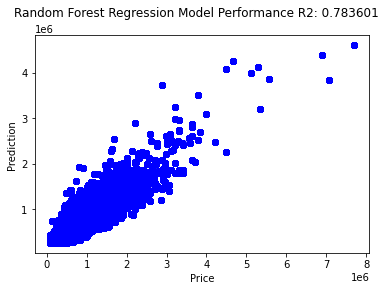

In [21]:
import matplotlib.pyplot as plt

rmse = evaluatorrf1.evaluate(predictionsRF)
r2 = evaluatorrf2.evaluate(predictionsRF)
rfPred = modelRF.transform(test_data)
rfResult = rfPred.toPandas()
plt.plot(rfResult.price, rfResult.prediction, 'bo')
plt.xlabel('Price')
plt.ylabel('Prediction')
plt.suptitle("Random Forest Regression Model Performance RMSE: %f" % rmse)
plt.suptitle("Random Forest Regression Model Performance R2: %f" % r2)
plt.show()

LINEAR REGRESSION

In [22]:
from pyspark.ml.regression import LinearRegression
lr = LinearRegression(featuresCol = 'features', labelCol='price', maxIter=10, regParam=0.3, elasticNetParam=0.8)

In [23]:
start_timeLR = time.perf_counter()

lr_model = lr.fit(training_data)
predictionsLR = lr_model.transform(test_data)

end_timeLR = time.perf_counter()

training_timeLR = end_timeLR - start_timeLR

In [24]:
print('Linear Regression Model Start Time = ', start_timeLR)
print('Linear Regression Model End Time = ', end_timeLR)
print('Linear Regression Model Total Training Time = ', training_timeLR)

Linear Regression Model Start Time =  12906.4534928
Linear Regression Model End Time =  12929.4715523
Linear Regression Model Total Training Time =  23.018059500000163


In [25]:
print("Coefficients: " + str(lr_model.coefficients))
print("Intercept: " + str(lr_model.intercept))

Coefficients: [-33781.90456823992,44304.38410494517,165.9245289242742,0.17945657355213132,3091.547393155144,637696.8061530556,44601.75427529079,31009.92727725403,102078.7086307187,-19.98828502635987,-2578.770570856301,20.049434095424623,555646.1918152566,-127207.61027445568,34.591110406616295,-0.46345929949096615]
Intercept: -37643899.34907922


In [26]:
# Evaluate our model
from pyspark.ml.evaluation import RegressionEvaluator, MulticlassClassificationEvaluator

evaluatorLR1 = RegressionEvaluator(labelCol="price", predictionCol="prediction", metricName="rmse")
evaluatorLR2 = RegressionEvaluator(labelCol="price", predictionCol="prediction", metricName="r2")

In [27]:
accuracy3 = evaluatorLR1.evaluate(predictionsLR)
accuracy4 = evaluatorLR2.evaluate(predictionsLR)
print('Linear Regression RMSE Test Accuracy = ', accuracy3)
print('Linear Regression R2 Test Accuracy = ', accuracy4)

Linear Regression RMSE Test Accuracy =  201390.22507004836
Linear Regression R2 Test Accuracy =  0.6943259906315016


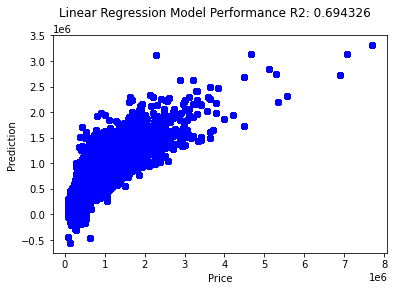

In [28]:
import matplotlib.pyplot as plt

rmse = evaluatorLR1.evaluate(predictionsLR)
r2 = evaluatorLR2.evaluate(predictionsLR)
rfPred = lr_model.transform(test_data)
rfResult = rfPred.toPandas()
plt.plot(rfResult.price, rfResult.prediction, 'bo')
plt.xlabel('Price')
plt.ylabel('Prediction')
plt.suptitle("Linear Regression Model Performance RMSE: %f" % rmse)
plt.suptitle("Linear Regression Model Performance R2: %f" % r2)
plt.show()

In [ ]:
bestPipeline = model.bestModel
bestModel = bestPipeline.stages[1]
importances = bestModel.featureImportances
x_values = list(range(len(importances)))
plt.bar(x_values, importances, orientation = 'vertical')
plt.xticks(x_values, feature_list, rotation=40)
plt.ylabel('Importance')
plt.xlabel('Feature')
plt.title('Feature Importances')

CORRELATION MATRIX

In [30]:
from pyspark.ml.stat import Correlation

matrix = Correlation.corr(training_data.select('features'), 'features')
matrix_np = matrix.collect()[0]["pearson({})".format('features')].values

/usr/local/spark/python/pyspark/sql/context.py:125: FutureWarning: Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.
  warnings.warn(


In [31]:
from IPython.core.display import display, HTML # my imports

# annot = dataset.display_image(21, use_url=False) #my function return a html page

# HTML(annot) # used for displaying the page

%matplotlib widget
%matplotlib inline

/tmp/ipykernel_1200/2746928295.py:1: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML # my imports


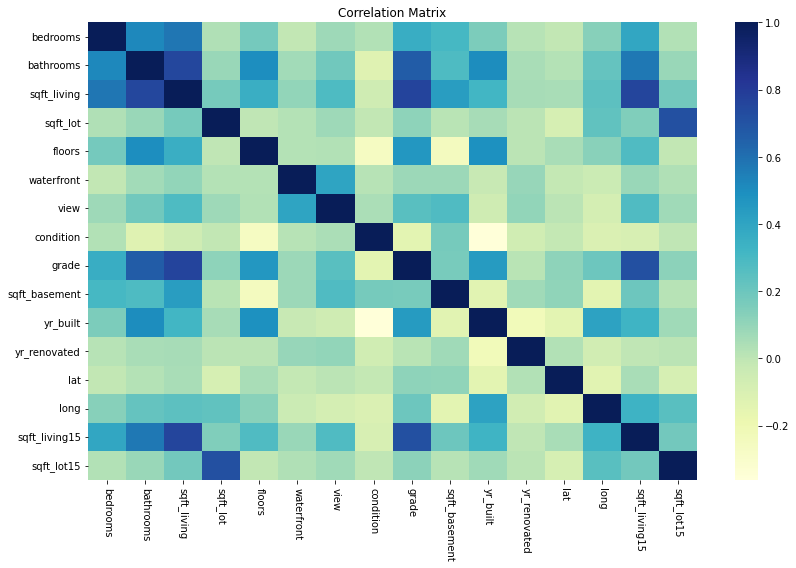

In [32]:
import seaborn as sns

matrix_np = matrix_np.reshape(len(required_features),len(required_features))

fig, ax = plt.subplots(figsize=(12,8))
ax = sns.heatmap(matrix_np, cmap="YlGnBu")
ax.xaxis.set_ticklabels(required_features, rotation=270)
ax.yaxis.set_ticklabels(required_features, rotation=0)
ax.set_title("Correlation Matrix")
plt.tight_layout()
plt.show()

In [33]:
from pyspark.ml.regression import RandomForestRegressor

rfr = RandomForestRegressor(labelCol='price', featuresCol='features', numTrees=50)

In [34]:
start_timeRFR = time.perf_counter()

modelRFR = rfr.fit(training_data)
predictionsRFR = modelRFR.transform(test_data)

end_timeRFR = time.perf_counter()

training_timeRFR = end_timeRFR - start_timeRFR

In [35]:
print('Random Forest Regression Model Start Time = ', start_timeRFR)
print('Random Forest Regression Model End Time = ', end_timeRFR)
print('Random Forest Regression Model Training Time = ', training_timeRFR)

Random Forest Regression Model Start Time =  14246.0991686
Random Forest Regression Model End Time =  14300.9872313
Random Forest Regression Model Training Time =  54.888062699999864


In [36]:
# Evaluate our model
from pyspark.ml.evaluation import RegressionEvaluator, MulticlassClassificationEvaluator
evaluatorRFR1 = RegressionEvaluator(labelCol="price", predictionCol="prediction", metricName="rmse")
evaluatorRFR2 = RegressionEvaluator(labelCol="price", predictionCol="prediction", metricName="r2")

In [37]:
accuracy5 = evaluatorRFR1.evaluate(predictionsRFR)
accuracy6 = evaluatorRFR2.evaluate(predictionsRFR)
print('Random Forest Regression RMSE Test Accuracy = ', accuracy5)
print('Random Forest Regression R2 Test Accuracy = ', accuracy6)

Random Forest Regression RMSE Test Accuracy =  165884.1939377346
Random Forest Regression R2 Test Accuracy =  0.7926081180851194


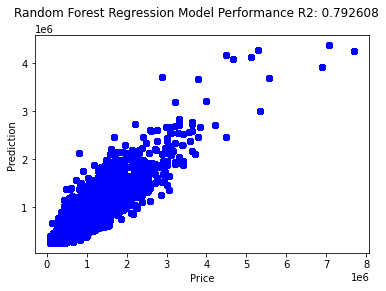

In [38]:
import matplotlib.pyplot as plt

rmse = evaluatorRFR1.evaluate(predictionsRFR)
r2 = evaluatorRFR2.evaluate(predictionsRFR)
rfPred = modelRFR.transform(test_data)
rfResult = rfPred.toPandas()
plt.plot(rfResult.price, rfResult.prediction, 'bo')
plt.xlabel('Price')
plt.ylabel('Prediction')
plt.suptitle("Random Forest Regression Model Performance RMSE: %f" % rmse)
plt.suptitle("Random Forest Regression Model Performance R2: %f" % r2)
plt.show()

In [39]:
display(df.select("date", "price"))

DataFrame[date: string, price: string]

GRADIENT BOOSTING REGRESSOR

In [40]:
import pyspark
from pyspark.sql import SparkSession
from pyspark.ml.regression import GBTRegressor
from pyspark.ml.feature import StringIndexer, VectorAssembler
from pyspark.ml.feature import VectorAssembler
from pyspark.ml import Pipeline
from pyspark.ml.evaluation import BinaryClassificationEvaluator
conf = pyspark.SparkConf().setAppName("Gradient Boosted Tree Regressor")

In [41]:
from pyspark.ml.regression import RandomForestRegressor, GBTRegressor
gbtregressor = GBTRegressor(featuresCol = 'features', labelCol = 'price', maxDepth = 30)

# maxIter=10

In [42]:
start_timeGB = time.perf_counter()

modelGB = gbtregressor.fit(training_data)
predictionsGB = modelGB.transform(test_data)

end_timeGB = time.perf_counter()

training_timeGB = end_timeGB - start_timeGB

In [43]:
print('Gradient Boosting Regression Model Start Time = ', start_timeGB)
print('Gradient Boosting Regression Model End Time = ', end_timeGB)
print('Gradient Boosting Regression Model Training Time = ', training_timeGB)

Gradient Boosting Regression Model Start Time =  14735.1608188
Gradient Boosting Regression Model End Time =  15280.1054099
Gradient Boosting Regression Model Training Time =  544.9445911000003


In [44]:
from pyspark.ml.evaluation import RegressionEvaluator, MulticlassClassificationEvaluator

evaluatorGB1 = RegressionEvaluator(labelCol="price", predictionCol="prediction", metricName="rmse")
evaluatorGB2 = RegressionEvaluator(labelCol="price", predictionCol="prediction", metricName="r2")

In [45]:
accuracy7 = evaluatorGB1.evaluate(predictionsGB)
accuracy8 = evaluatorGB2.evaluate(predictionsGB)
print('Gradient Boosting Regression RMSE Test Accuracy = ', accuracy7)
print('Gradient Boosting Regression R2 Test Accuracy = ', accuracy8)

Gradient Boosting Regression RMSE Test Accuracy =  11540.732664092053
Gradient Boosting Regression R2 Test Accuracy =  0.9989961969736467


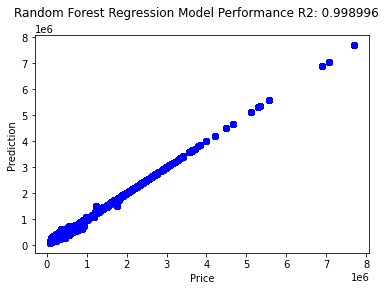

In [46]:
import matplotlib.pyplot as plt

rmse = evaluatorGB1.evaluate(predictionsGB)
r2 = evaluatorGB2.evaluate(predictionsGB)
rfPred = modelGB.transform(test_data)
rfResult = rfPred.toPandas()
plt.plot(rfResult.price, rfResult.prediction, 'bo')
plt.xlabel('Price')
plt.ylabel('Prediction')
plt.suptitle("Random Forest Regression Model Performance RMSE: %f" % rmse)
plt.suptitle("Random Forest Regression Model Performance R2: %f" % r2)
plt.show()

DECISION TREE REGRESSION

In [47]:
import pyspark
from pyspark.ml.regression import DecisionTreeRegressionModel, DecisionTreeRegressor

In [48]:
DecisionTree = DecisionTreeRegressor(featuresCol = 'features', labelCol = 'price', maxDepth = 10, maxBins=32)

In [49]:
start_timeDT = time.perf_counter()

modelDT = DecisionTree.fit(training_data)
predictionsDT = modelDT.transform(test_data)

end_timeDT = time.perf_counter()

training_timeDT = end_timeDT - start_timeDT

In [50]:
print('Decision Tree Regression Model Start Time = ', start_timeDT)
print('Decision Tree Boosting Regression Model End Time = ', end_timeDT)
print('Decision Tree Regression Model Training Time = ', training_timeDT)

Decision Tree Regression Model Start Time =  15577.292282
Decision Tree Boosting Regression Model End Time =  15606.9424047
Decision Tree Regression Model Training Time =  29.650122699998974


In [51]:
from pyspark.ml.evaluation import RegressionEvaluator, MulticlassClassificationEvaluator

evaluatorDT1 = RegressionEvaluator(labelCol="price", predictionCol="prediction", metricName="rmse")
evaluatorDT2 = RegressionEvaluator(labelCol="price", predictionCol="prediction", metricName="r2")

In [52]:
accuracy9 = evaluatorDT1.evaluate(predictionsDT)
accuracy10 = evaluatorDT2.evaluate(predictionsDT)
print('Decision Tree Regression RMSE Test Accuracy = ', accuracy9)
print('Decision Tree Regression R2 Test Accuracy = ', accuracy10)

Decision Tree Regression RMSE Test Accuracy =  113439.64658195298
Decision Tree Regression R2 Test Accuracy =  0.903013459469707


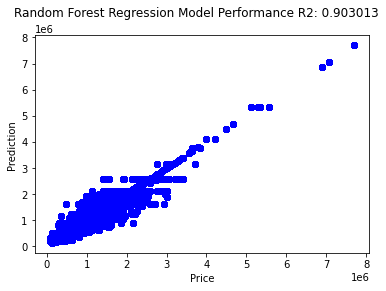

In [53]:
import matplotlib.pyplot as plt

rmse = evaluatorDT1.evaluate(predictionsDT)
r2 = evaluatorDT2.evaluate(predictionsDT)
rfPred = modelDT.transform(test_data)
rfResult = rfPred.toPandas()
plt.plot(rfResult.price, rfResult.prediction, 'bo')
plt.xlabel('Price')
plt.ylabel('Prediction')
plt.suptitle("Random Forest Regression Model Performance RMSE: %f" % rmse)
plt.suptitle("Random Forest Regression Model Performance R2: %f" % r2)
plt.show()

sns

In [54]:
modelRF.featureImportances

SparseVector(16, {0: 0.008, 1: 0.0877, 2: 0.218, 3: 0.0027, 4: 0.0, 5: 0.0335, 6: 0.0261, 7: 0.0013, 8: 0.2787, 9: 0.0027, 10: 0.0178, 11: 0.0009, 12: 0.1148, 13: 0.0412, 14: 0.1642, 15: 0.0024})

In [55]:
training_data.take(1)

[Row(price=75000.0, bedrooms=1, bathrooms=0.0, sqft_living=670, sqft_lot=43377, floors=1.0, waterfront=0, view=0, condition=3, grade=3, sqft_basement=0, yr_built=1966, yr_renovated=0, lat=47.26380157470703, long=-121.90599822998047, sqft_living15=1160, sqft_lot15=42882, features=DenseVector([1.0, 0.0, 670.0, 43377.0, 1.0, 0.0, 0.0, 3.0, 3.0, 0.0, 1966.0, 0.0, 47.2638, -121.906, 1160.0, 42882.0]))]

KMEANS ALGORITHM

In [ ]:
from pyspark.ml.feature import StandardScalar

scalar = StandardScalar(inputCol = required_features, oututcol = 'features')
scalar_model = scalar.fit(transformed_data)
transformed_data1 = scalar_model.transform(transformed_data)
transformed_data1.printSchema()

In [56]:
from pyspark.ml.clustering import KMeans

In [57]:
kmeans2 = KMeans(featuresCol = 'features', k=2)
kmeans3 = KMeans(featuresCol = 'features', k=3)
kmeans10 = KMeans(featuresCol = 'features', k=10)

In [58]:
start_timeKM = time.perf_counter()

model_k2 = kmeans2.fit(transformed_data)
model_k3 = kmeans3.fit(transformed_data)
model_k10 = kmeans10.fit(transformed_data)

end_timeKM = time.perf_counter()

training_timeKM = end_timeKM - start_timeKM

In [59]:
print('Decision Tree Regression Model Start Time = ', start_timeKM)
print('Decision Tree Boosting Regression Model End Time = ', end_timeKM)
print('Decision Tree Regression Model Training Time = ', training_timeKM)

Decision Tree Regression Model Start Time =  16457.578523
Decision Tree Boosting Regression Model End Time =  16543.7923473
Decision Tree Regression Model Training Time =  86.21382430000085


In [66]:
# Make predictions 
predictionsK2 = model_k2.transform(training_data)
from pyspark.ml.evaluation import ClusteringEvaluator
# Evaluate clustering by computing Silhouette score
evaluator1 = ClusteringEvaluator()
silhouette1 = evaluator1.evaluate(predictionsK2)
print("Silhouette with squared euclidean distance = " + str(silhouette1))

Silhouette with squared euclidean distance = 0.979522914998058


In [67]:
# Make predictions 
predictionsK3 = model_k3.transform(training_data)
from pyspark.ml.evaluation import ClusteringEvaluator
# Evaluate clustering by computing Silhouette score
evaluator2 = ClusteringEvaluator()
silhouette2 = evaluator2.evaluate(predictionsK3)
print("Silhouette with squared euclidean distance = " + str(silhouette2))

Silhouette with squared euclidean distance = 0.9754691847675738


In [68]:
# Make predictions 
predictionsK10 = model_k10.transform(training_data)
from pyspark.ml.evaluation import ClusteringEvaluator
# Evaluate clustering by computing Silhouette score
evaluator3 = ClusteringEvaluator()
silhouette3 = evaluator3.evaluate(predictionsK10)
print("Silhouette with squared euclidean distance = " + str(silhouette3))

Silhouette with squared euclidean distance = 0.628720954966732


In [ ]:
#Let's have a tabular pandas data frame, for a clear comparison
models_score =pd.DataFrame({
                           
'Model':['Multiple Linear Regression',
         'Random forest Regression'
        ],
'Score':[accuracy2,
         accuracy4
        ]
                                                     
})
#models_score.sort_values(by='Score',ascending=True)
models_score

In [62]:
import pyspark
from pyspark.ml.classification import NaiveBayes

In [65]:
nbc = NaiveBayes(labelCol="price", featuresCol="features")

In [ ]:
start_timeNB = time.perf_counter()

modelNB = nbc.fit(training_data)
predictionsNB = modelNB.transform(test_data)

end_timeNB = time.perf_counter()

training_timeNB = end_timeRFR - start_timeRFR

In [ ]:
print('Gradient Boosting Regression Model Start Time = ', start_timeGB)
print('Gradient Boosting Regression Model End Time = ', end_timeGB)
print('Gradient Boosting Regression Model Training Time = ', training_timeGB)

DATA VISUALIZATION

In [70]:
display(df.select("bedrooms", "price"))

DataFrame[bedrooms: string, price: string]

In [71]:
display(df.select("yr_renovated", "price"))

DataFrame[yr_renovated: string, price: string]

In [72]:
display(df.select("grade", "price"))

DataFrame[grade: string, price: string]

In [73]:
display(df.select("sqft_lot", "sqft_above"))

DataFrame[sqft_lot: string, sqft_above: string]